<a href="https://www.kaggle.com/code/bharawaj/capstone-project-gen-ai?scriptVersionId=235006067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gen-ai-capstone-project/mega project/.env
/kaggle/input/gen-ai-capstone-project/mega project/tasks.txt
/kaggle/input/gen-ai-capstone-project/mega project/m.py
/kaggle/input/gen-ai-capstone-project/mega project/tempCodeRunnerFile.py
/kaggle/input/gen-ai-capstone-project/mega project/.venv/.gitignore
/kaggle/input/gen-ai-capstone-project/mega project/.venv/pyvenv.cfg
/kaggle/input/gen-ai-capstone-project/mega project/.venv/Scripts/pyrsa-keygen.exe
/kaggle/input/gen-ai-capstone-project/mega project/.venv/Scripts/pywin32_postinstall.exe
/kaggle/input/gen-ai-capstone-project/mega project/.venv/Scripts/normalizer.exe
/kaggle/input/gen-ai-capstone-project/mega project/.venv/Scripts/flask.exe
/kaggle/input/gen-ai-capstone-project/mega project/.venv/Scripts/deactivate.bat
/kaggle/input/gen-ai-capstone-project/mega project/.venv/Scripts/pyrsa-verify.exe
/kaggle/input/gen-ai-capstone-project/mega project/.venv/Scripts/activate.bat
/kaggle/input/gen-ai-capstone-project/mega project/.

# **🤖 Project Overview: Jarvis Command Processor with GENAI Integration** 

# **🌟 Introduction**

The Jarvis Command Processor is a virtual assistant leveraging GENAI, capable of handling voice or text commands, retrieving real-time data, and managing tasks. It supports a wide array of functions such as querying Wikipedia, checking the weather, opening websites, and generating structured task lists.

# **Use Case (Problem and Solution)**

**Problem ⚠️**

* Many users require an assistant to perform daily tasks and respond to queries, but existing solutions may not be flexible.

**Solution 💡**

*  A smart assistant that can process commands intelligently and handle diverse tasks like generating tasks, fetching data, and interacting with external services like Wikipedia and Google.





# **🤖 GENAI Capabilities used in the Project**

GENAI provides the ability to:

* Generate Content: Handle natural language queries and generate responses.

* Task Management: Create structured to-do lists in JSON format, making it easy to track and manage tasks.

* Function Execution: Execute commands such as opening web pages or checking the current time.

# **Setups and Requirements 🛠️**

To run the project, ensure you have:

**Libraries:**

    * google.generativeai for AI integration

    * wikipedia for querying Wikipedia

    * dotenv for API key management

    * Standard Python libraries (json, webbrowser, datetime)

* Environment Setup: Ensure the GEMINI_API_KEY is stored in a .env file for access.



# **⚙️ How It Works**

**1. User Command:** Users type commands such as "open Google" or "ask about AI".

**2. Command Processing:** The program identifies the type of command and either performs an action (e.g., opening a website) or queries the GENAI model.

**3. External Interaction:** Web-related tasks (e.g., searching Google or YouTube) are handled via APIs.



# **Use of Project in Real World🌍**

* Personal Assistant: Automates personal tasks like checking time, answering queries, and managing to-do lists.

* Task Management: Users can manage tasks more effectively through simple text-based commands.
like web browsing, date/time display, or task management are executed

# **Code Explanation📝**

* processCommand(): Handles user commands by checking for specific keywords and executing corresponding functions.

* ask_gemini(): Queries the GENAI model for generating content or answering user queries.

* structured_output_task_list(): Generates structured task lists in JSON format, allowing easy task management.


# **🏗️ Simple Architecture**

* Input: User provides a command (e.g., "open YouTube").

* Processing: The program determines the action to take or generates an AI response.

* External Actions: Functions like web browsing, date/time display, or task management are executed
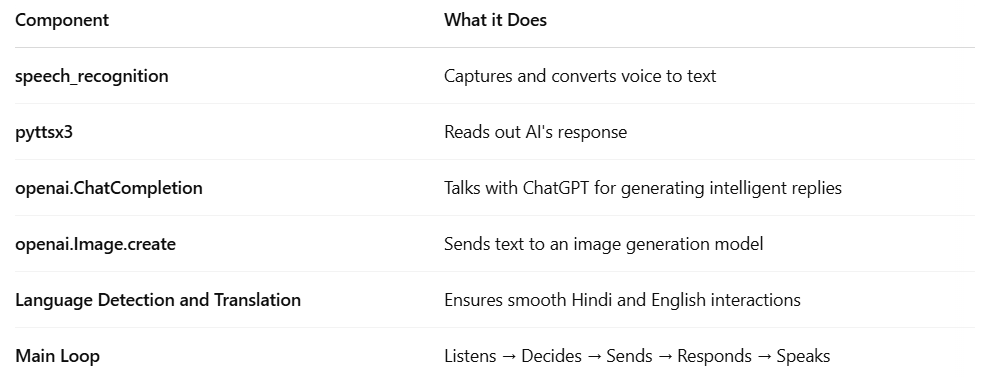
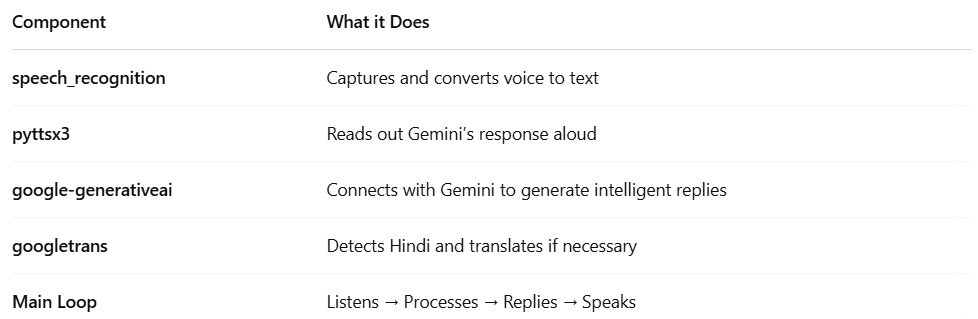

# **🏁 Conclusion**
* The Jarvis Command Processor is a foundational project showcasing the use of AI in creating a personal assistant. It can be expanded by adding new capabilities like speech recognition, IoT device control, and additional AI functionalities.

# **Why This Matters**

* This assistant can enhance productivity by automating mundane tasks and providing intelligent, quick responses. It's a starting point for developing more advanced virtual assistants.

# **🚀 How to Enhance This Project in the Future**

* Voice Interaction: Add speech recognition for a hands-free experience.

* Extended API Integrations: Connect to additional services such as weather forecasts, music streaming, and more.

* Real-Time Task Syncing: Sync tasks and to-do lists across multiple devices in real time.

# **Install Dependencies**

In [29]:
# Install required libraries
!pip install wikipedia python-dotenv google-generativeai

In [30]:
# Import libraries
import webbrowser
import datetime
import wikipedia
import json
import os
from dotenv import load_dotenv
import google.generativeai as genai

In [31]:
# Load API key from .env
load_dotenv()
genai.configure(api_key=os.getenv("GEMINI_API_KEY"))
generation_config = {"temperature": 0.9, "top_p": 0.9, 'top_k': 1, "max_output_tokens": 1000}

# Initialize Gemini model
model = genai.GenerativeModel(model_name='models/gemini-1.5-pro')



In [32]:
# Generate answer using Gemini
def ask_gemini(prompt):
    response = model.generate_content(prompt)
    return response.text

In [33]:
# Structured Output / JSON response
def structured_output_task_list(prompt):
    try:
        # Adjust the prompt to instruct Gemini to return valid JSON directly
        prompt = """Create a structured to-do list for today in strict JSON format without markdown blocks.
        Format exactly like this:
        {
          "tasks": [
            {"task": "Buy groceries", "priority": "High", "time": "10:00"},
            {"task": "Study Python", "priority": "Medium", "time": "14:00"}
          ]
        }"""
        
        response = model.generate_content(prompt)
        cleaned_text = response.text.strip()

        # Remove potential code block markers
        if cleaned_text.startswith("```"):
            cleaned_text = "\n".join(cleaned_text.split("\n")[1:-1]).strip()

        # Attempt to parse the cleaned response as JSON
        data = json.loads(cleaned_text)
        return data
    
    except json.JSONDecodeError as e:
        print("❌ Failed to parse JSON:", e)
        print("⚠️ Raw response:\n", response.text)
        return {}
    except Exception as e:
        print("❌ Error generating structured content:", e)
        return {}

In [34]:
# Simulated Function Calling
def function_caller(prompt):
    if "weather" in prompt:
        print("🌦️ Opening weather...")
        webbrowser.open("https://www.google.com/search?q=weather")
    elif "open youtube" in prompt:
        print("🎬 Opening YouTube...")
        webbrowser.open("https://www.youtube.com")
    elif "say time" in prompt:
        now = datetime.datetime.now()
        print("⏰ Time is", now.strftime("%H:%M"))
    else:
        print("❓ No matching function found.")

In [35]:

# Core command processor
def processCommand(c):
    c = c.lower()

    if "open google" in c:
        webbrowser.open("https://www.google.com")

    elif "open youtube" in c:
        webbrowser.open("https://www.youtube.com")

    elif "say time" in c:
        now = datetime.datetime.now()
        print("⏰ Time is", now.strftime("%H:%M"))

    elif "say date" in c:
        now = datetime.datetime.now()
        print("📅 Date is", now.strftime("%Y-%m-%d"))

    elif "open chatgpt" in c:
        webbrowser.open("https://www.chatgpt.com")

    elif "new task" in c:
        task = c.replace("new task", "").strip()
        if task != "":
            print("📝 Adding task:", task)
            with open("tasks.txt", "a") as f:
                f.write(task + "\n")

    elif "show task" in c:
        with open("tasks.txt", "r") as f:
            tasks = f.readlines()
            print("📋 Your tasks:")
            for task in tasks:
                print("-", task.strip())

    elif "wikipedia" in c:
        request = c.replace("jarvis", "").replace("search wikipedia", "").strip()
        result = wikipedia.summary(request, sentences=2)
        print("📚 Wikipedia Result:", result)

    elif "search google" in c:
        request = c.replace("jarvis", "").replace("search google", "").strip()
        webbrowser.open("https://www.google.com/search?q=" + request)


    # GEN-AI Capabilities
    elif c.startswith("question"):
        prompt = c.replace("question", "").strip()
        print("🤖 Thinking...")
        answer = ask_gemini(prompt)
        print("🧠", answer)

    elif "structured task list" in c:
        prompt = """Create a structured to-do list for today in strict JSON format without markdown blocks.
        Format exactly like this:
        {
          "tasks": [
            {"task": "Buy groceries", "priority": "High", "time": "10:00"},
            {"task": "Study Python", "priority": "Medium", "time": "14:00"}
          ]
        }"""
        print("📑 Generating structured task list...")
        task_json = structured_output_task_list(prompt)
        if task_json:
            print("✅ Task List:")
            for task in task_json.get("tasks", []):
                print(f"- {task.get('task')} at {task.get('time')} [Priority: {task.get('priority')}]")
        else:
            print("⚠️ Couldn't understand the task list.")

    elif "call function" in c:
        prompt = c.replace("call function", "").strip()
        print("🔧 Calling function...")
        function_caller(prompt)

    else:
        print("⚠️ Unknown command. Try another.")

In [37]:
# Main loop
if __name__ == "__main__":
    print("🤖 Jarvis Initialized!")
    print("📌 Type a command below (e.g., 'question what is AI', 'structured task list'):\n")
    while True:
        user_input = input(">> ")
        if user_input.lower() in ["exit", "quit"]:
            print("👋 Bye! Jarvis shutting down.")
            break
        processCommand(user_input)

🤖 Jarvis Initialized!
📌 Type a command below (e.g., 'question what is AI', 'structured task list'):



>>  structured task list


📑 Generating structured task list...
❌ Error generating structured content: 
  No API_KEY or ADC found. Please either:
    - Set the `GOOGLE_API_KEY` environment variable.
    - Manually pass the key with `genai.configure(api_key=my_api_key)`.
    - Or set up Application Default Credentials, see https://ai.google.dev/gemini-api/docs/oauth for more information.
⚠️ Couldn't understand the task list.


>>  exist


⚠️ Unknown command. Try another.


>>  quit


👋 Bye! Jarvis shutting down.


# **🧠Final Thoughts: From Reading to Reasoning**
* Represents progress in personal assistant technologies.

* Demonstrates AI's potential to handle real-world tasks.

* GENAI integration enables intelligent, context-aware responses.

# **Key Points in Reasoning Journey**

* **AI Integration:** Using the GENAI API for natural language processing and content generation.

* **Automation:** Automates tasks like browsing, task management, and querying external services.

Thus, this project is not just a simple assistant.

# **🙌 Thank You for Exploring!**